# Import necesaary libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/kaggle_Interests_group.csv")

In [3]:
df.columns


Index(['group', 'grand_tot_interests', 'interest1', 'interest2', 'interest3',
       'interest4', 'interest5', 'interest6', 'interest7', 'interest8',
       ...
       'interest208', 'interest209', 'interest210', 'interest211',
       'interest212', 'interest213', 'interest214', 'interest215',
       'interest216', 'interest217'],
      dtype='object', length=219)

In [4]:
df.isna().sum()

group                     0
grand_tot_interests       0
interest1              5347
interest2              6339
interest3              6305
                       ... 
interest213            6338
interest214            6268
interest215            1397
interest216            2282
interest217            6193
Length: 219, dtype: int64

In [5]:
df.fillna(0, inplace= True)

In [6]:
x = df.iloc[:,2:]
print(x)

      interest1  interest2  interest3  ...  interest215  interest216  interest217
0           0.0        0.0        0.0  ...          0.0          0.0          0.0
1           1.0        0.0        0.0  ...          1.0          1.0          0.0
2           0.0        0.0        0.0  ...          1.0          1.0          0.0
3           0.0        0.0        0.0  ...          1.0          1.0          0.0
4           0.0        0.0        0.0  ...          1.0          1.0          0.0
...         ...        ...        ...  ...          ...          ...          ...
6335        0.0        0.0        0.0  ...          1.0          1.0          0.0
6336        0.0        0.0        0.0  ...          1.0          1.0          0.0
6337        0.0        0.0        0.0  ...          1.0          1.0          0.0
6338        0.0        0.0        0.0  ...          1.0          1.0          0.0
6339        1.0        0.0        0.0  ...          1.0          1.0          0.0

[6340 rows x 21

# Elbow Method

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters = i, init = "k-means++")
  model.fit(x)
  wcss.append(model.inertia_)

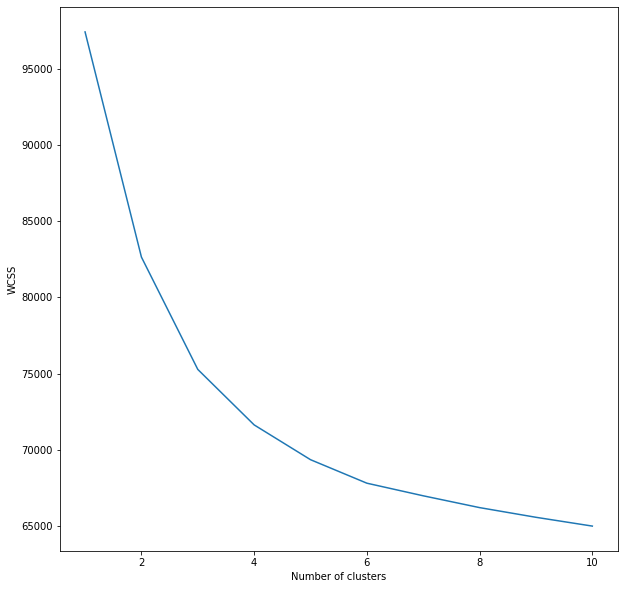

In [8]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying PCA in 2 dimensions

In [9]:
from sklearn.decomposition import PCA
pca = PCA(2)

In [10]:
data = pca.fit_transform(x)


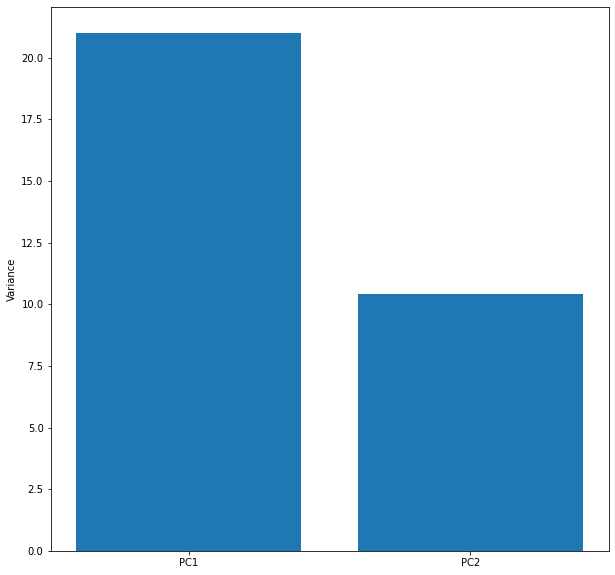

In [11]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = ['PC'+ str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.ylabel('Variance')
plt.show()

# Training the models

**with 4 clusters**

In [12]:
model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(data)
print(label)

[0 2 3 ... 1 2 2]


In [13]:
model2 = KMeans(n_clusters = 6, init = "k-means++")
y2 = model2.fit_predict(x)

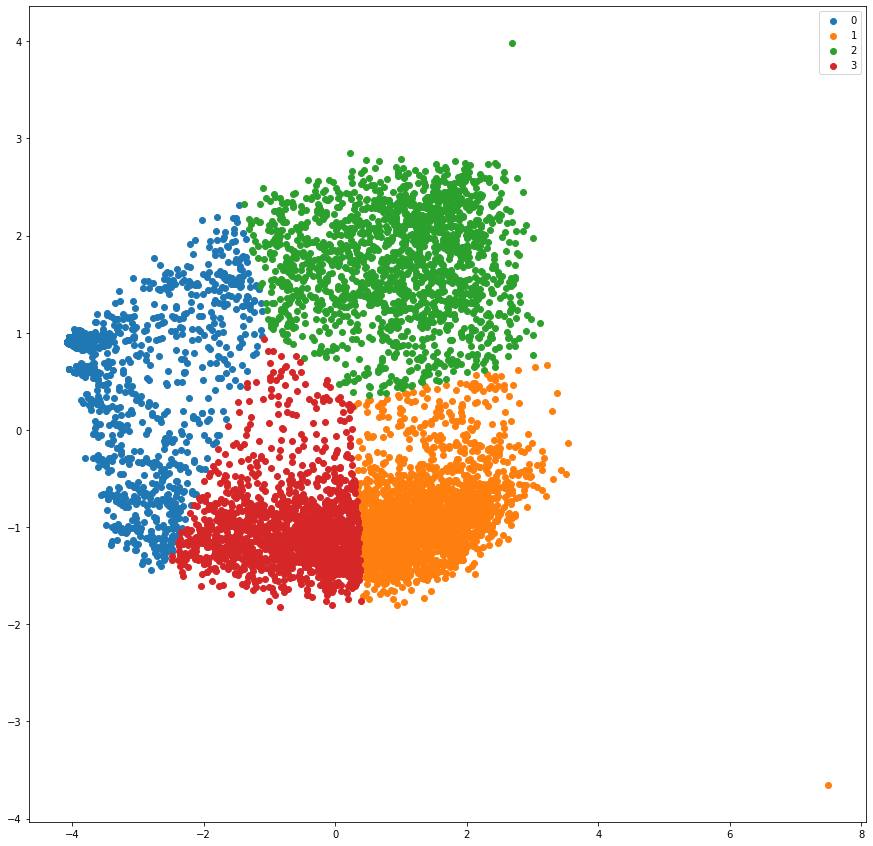

In [14]:
plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
  
plt.legend()
plt.show()

**with 6 clusters**

In [15]:
label2 = model2.fit_predict(data)

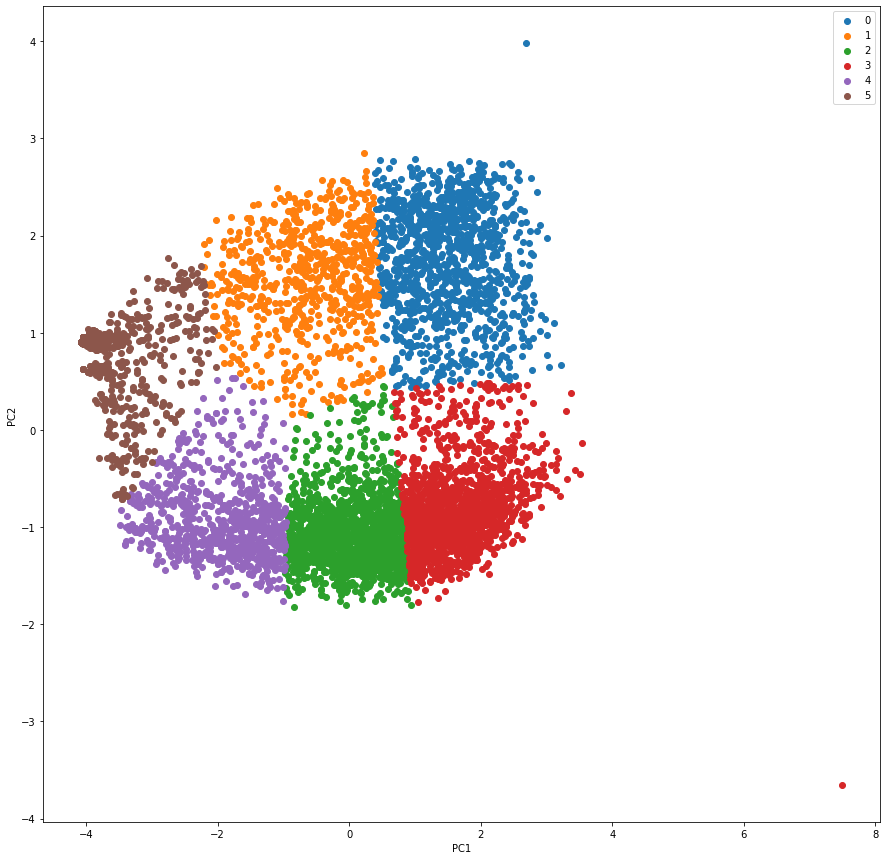

In [16]:
plt.figure(figsize=(15,15))
uniq = np.unique(label2)
for i in uniq:
  plt.scatter(data[label2 == i , 0] , data[label2 == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**Plotting centroids in 6 cluster model**

In [17]:
centers = np.array(model2.cluster_centers_)

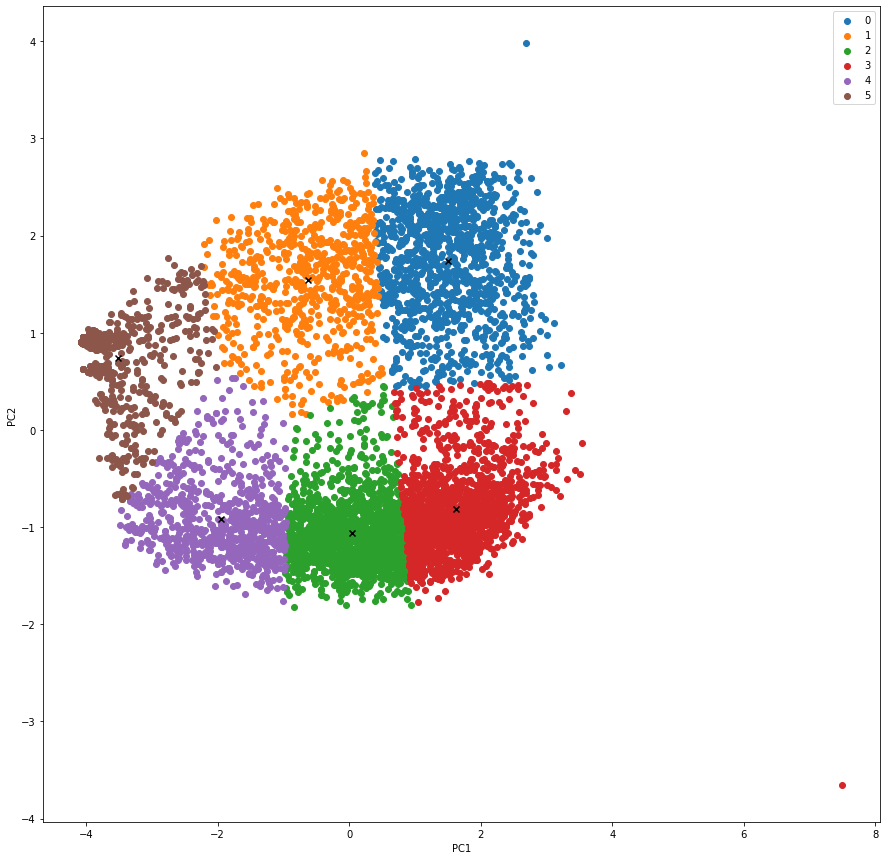

In [18]:
plt.figure(figsize=(15,15))
uniq = np.unique(label2)

for i in uniq:
  plt.scatter(data[label2 == i , 0] , data[label2 == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.legend()
plt.show()
